### Workshop - 1: K- Means Clustering
This notebook will walk through some of the basics of K-Means Clustering.

## Author: Nenavath Krishna


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['Type']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### preparing the data
Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use .values function to get an array of the dataset. (Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).

In [14]:
iris_X = data.iloc[:, [0, 1, 2,3]].values

In [15]:
iris_Y = data['Type']
iris_Y = np.array(iris_Y)

### Visualise Classes

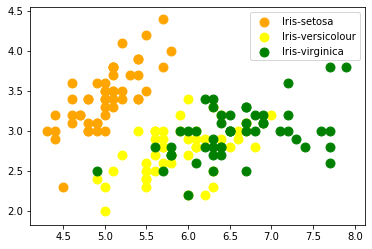

In [21]:
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

### K-Means Clustering

In [22]:
# import KMeans from sklearn.cluster to run a K-Means model.
from sklearn.cluster import KMeans

In [23]:
# Deciding Value of K

wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

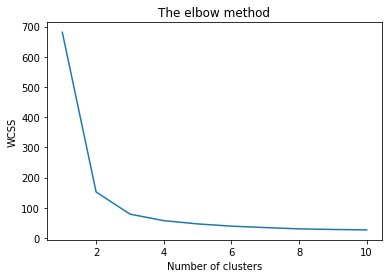

In [24]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In the elbow graph, we look for the points where the drop falls and the line smoothens out. In the above graph, this happens for k=3.  WCSS is less than 100, which is good for us. So we take k =3.

In [37]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_X)

### visualizing the clusters.

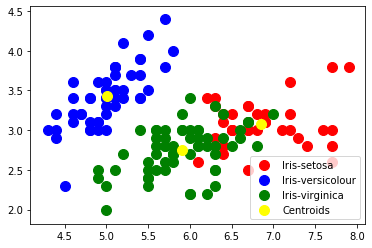

In [38]:
# Visualising the clusters - On the first two columns
plt.scatter(iris_X[y_kmeans == 0, 0], iris_X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_X[y_kmeans == 1, 0], iris_X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_X[y_kmeans == 2, 0], iris_X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()